In [29]:
import sklearn.decomposition as sk_decomp
from sklearn import linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score as cvs
from sklearn.svm import l1_min_c
import os

In [30]:
os.chdir("C:\\Users\\dwarf\\Dataproject")

In [32]:
meth_even = pd.read_csv("raw_data\combined_data\combined_2mers_meth_even.tsv", sep="\t")
meth_odd = pd.read_csv("raw_data\combined_data\combined_2mers_meth_odd.tsv", sep="\t")
unmeth_even = pd.read_csv("raw_data\combined_data\combined_2mers_unmeth_even.tsv", sep="\t")
unmeth_odd = pd.read_csv("raw_data\combined_data\combined_2mers_unmeth_odd.tsv", sep="\t")
#unmeth = pd.read_csv("processed_data\combined_data\split_with_background\combined_2mers_unmeth.tsv", sep="\t")

In [ ]:
#meth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_even_with_background.tsv", sep="\t")
#meth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_odd_with_background.tsv", sep="\t")
#unmeth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_even_with_background.tsv", sep="\t")
#unmeth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_odd_with_background.tsv", sep="\t")

In [ ]:
meth_even = meth_even.loc[meth_even["cancer"]=="Healthy"]
meth_odd = meth_odd.loc[meth_odd["cancer"]=="Healthy"]
unmeth_even = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]
unmeth_odd = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]

#meth = meth.iloc[: , :-1]
#unmeth = unmeth.iloc[: , :-1]

In [6]:
meth_even=meth_even.drop(306)
meth_odd=meth_odd.drop(306)
unmeth_even=unmeth_even.drop(306)
unmeth_odd=unmeth_odd.drop(306)

In [7]:
trow = np.shape(meth_even)[0]

In [8]:
frames = [meth_even,meth_odd,unmeth_even,unmeth_odd]
combo = pd.concat(frames)
combo = combo.iloc[: , :-1]

In [9]:
ncomp = np.shape(combo)[1]

In [10]:
pca = sk_decomp.PCA(n_components=ncomp)
combo = pca.fit_transform(combo)

In [11]:
y1 = [0]*(trow)
y2 = [0]*(trow)
y3 = [1]*(trow)
y4= [1]*(trow)
Y = [y1,y2,y3,y4]
Ytrain = [y1,y3]
Ytest = [y2,y4]

In [12]:
y = []
for i in range(4):
    for j in Y[i]:
        y.append(Y[i][j])

In [13]:
ytrain = []
for i in range(2):
    for j in Ytrain[i]:
        ytrain.append(Ytrain[i][j])

In [14]:
ytest = []
for i in range(2):
    for j in Ytest[i]:
        ytest.append(Ytest[i][j])

In [15]:
y1p = [0]*(trow)
y2p = [0]*(trow)
y3p = [1]*(trow)
y4p= [1]*(trow)
Yp = [y1p,y2p,y3p,y4p]

In [16]:
yp = []
for i in range(4):
    for j in Yp[i]:
        yp.append(Yp[i][j])

In [17]:
x1 = combo[trow * 0:trow * 1]
x2 = combo[trow * 1:(trow * 2)]
x3 = combo[trow * 2:(trow * 3)]
x4 = combo[trow * 3:(trow * 4)]
X = [x1,x2,x3,x4]
Xtrain = [x1,x3]
Xtest = [x2,x4]

In [18]:
x = []
for i in range(4):
    for j in range(len(X[i])):
        x.append(X[i][j])

In [19]:
xtrain = []
for i in range(2):
    for j in range(len(Xtrain[i])):
        xtrain.append(Xtrain[i][j])
xtest = []
for i in range(2):
    for j in range(len(Xtest[i])):
        xtest.append(Xtest[i][j])

In [20]:
cs = l1_min_c(xtrain,ytrain, loss = 'log') * np.logspace(0,10,16)

In [21]:
clf = LR(penalty = 'l1',solver='liblinear',tol=1e-6,max_iter=100,warm_start=True,intercept_scaling=10000.0)

In [22]:
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(xtrain,ytrain)
    coefs_.append(clf.coef_.ravel().copy())
coefs_ = np.array(coefs_)

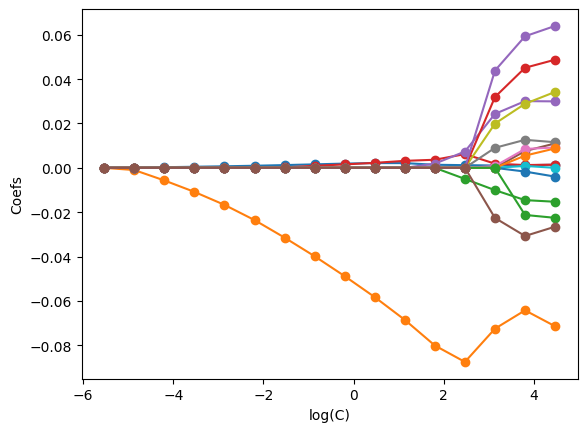

In [23]:
plt.plot(np.log10(cs),coefs_,marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefs")
plt.axis("tight")
plt.savefig('Log_Reg_Fit_Coef_Fig_Raw')
plt.show()

In [24]:
clf.predict_proba(xtest)

array([[1.00000000e+00, 4.86648295e-12],
       [1.00000000e+00, 1.09484974e-14],
       [1.00000000e+00, 1.99573499e-11],
       [9.99999999e-01, 1.47092906e-09],
       [1.00000000e+00, 8.93459395e-12],
       [1.00000000e+00, 1.08907405e-20],
       [9.99999998e-01, 2.04488556e-09],
       [9.99999949e-01, 5.13222897e-08],
       [1.00000000e+00, 1.40881557e-78],
       [1.00000000e+00, 2.10294232e-11],
       [1.00000000e+00, 9.49753320e-21],
       [1.00000000e+00, 1.05221332e-11],
       [9.99999726e-01, 2.74026935e-07],
       [1.00000000e+00, 2.50857521e-19],
       [1.00000000e+00, 6.54256482e-15],
       [1.00000000e+00, 3.28310939e-18],
       [1.00000000e+00, 1.06621019e-10],
       [1.00000000e+00, 5.92194025e-11],
       [1.00000000e+00, 2.94943031e-10],
       [9.99999999e-01, 5.73798934e-10],
       [9.99999980e-01, 1.96952097e-08],
       [1.00000000e+00, 8.98035549e-16],
       [9.99999940e-01, 5.99420971e-08],
       [9.99999999e-01, 1.43866733e-09],
       [1.000000

In [25]:
scores = cvs(clf, xtest, ytest)
scores.mean()

1.0